In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel as C, RationalQuadratic
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm

## Data

In [ ]:
# Define the input data points as a NumPy array
X = np.array([
    [0.60499445, 0.29221502, 0.90845275, 0.35550624, 0.20166872, 0.57533801, 0.31031095, 0.73428138],
    [0.17800696, 0.56622265, 0.99486184, 0.21032501, 0.32015266, 0.70790879, 0.63538449, 0.10713163],
    [0.00907698, 0.81162615, 0.52052036, 0.07568668, 0.26511183, 0.09165169, 0.59241515, 0.36732026],
    [0.50602816, 0.65373012, 0.36341078, 0.17798105, 0.0937283,  0.19742533, 0.7558269,  0.29247234],
    [0.35990926, 0.24907568, 0.49599717, 0.70921498, 0.11498719, 0.28920692, 0.55729515, 0.59388173],
    [0.77881834, 0.0034195,  0.33798313, 0.51952778, 0.82090699, 0.53724669, 0.5513471,  0.66003209],
    [0.90864932, 0.0622497,  0.23825955, 0.76660355, 0.13233596, 0.99024381, 0.68806782, 0.74249594],
    [0.58637144, 0.88073573, 0.74502075, 0.54603485, 0.00964888, 0.74899176, 0.23090707, 0.09791562],
    [0.76113733, 0.85467239, 0.38212433, 0.33735198, 0.68970832, 0.30985305, 0.63137968, 0.04195607],
    [0.9849332,  0.69950626, 0.9988855,  0.18014846, 0.58014315, 0.23108719, 0.49082694, 0.31368272],
    [0.11207131, 0.43773566, 0.59659878, 0.59277563, 0.22698177, 0.41010452, 0.92123758, 0.67475276],
    [0.79188751, 0.57619134, 0.69452836, 0.28342378, 0.13675546, 0.27916186, 0.84276726, 0.62532792],
    [0.1435503,  0.93741452, 0.23232482, 0.00904349, 0.41457893, 0.40932517, 0.55377852, 0.2058408 ],
    [0.76991655, 0.45875909, 0.55900044, 0.69460444, 0.50319902, 0.72834638, 0.78425353, 0.66313109],
    [0.05644741, 0.06595555, 0.02292868, 0.03878647, 0.40393544, 0.80105533, 0.48830701, 0.89308498],
    [0.86243745, 0.48273382, 0.2818694,  0.54410223, 0.88749026, 0.38265469, 0.60190199, 0.47646169],
    [0.3515119,  0.59006494, 0.9094363,  0.67840835, 0.21282566, 0.08846038, 0.410153,  0.19572429],
    [0.73590364, 0.03461189, 0.72803027, 0.14742652, 0.29574314, 0.44511731, 0.97517969, 0.37433978],
    [0.68029397, 0.25510465, 0.86218799, 0.13439582, 0.3263292,  0.28790687, 0.43501048, 0.36420013],
    [0.04432925, 0.01358149, 0.25819824, 0.57764416, 0.05127992, 0.15856307, 0.59103012, 0.07795293],
    [0.77834548, 0.75114565, 0.31414221, 0.90298577, 0.33538166, 0.38632267, 0.74897249, 0.9887551 ],
    [0.89888711, 0.5236417,  0.87678325, 0.21869645, 0.90026089, 0.28276624, 0.91107791, 0.47239822],
    [0.14512029, 0.11932754, 0.42088822, 0.38760861, 0.15542283, 0.87517163, 0.51055967, 0.72861058],
    [0.33895442, 0.56693202, 0.3767511,  0.09891573, 0.65945169, 0.24554809, 0.76248278, 0.73215347],
    [0.17615002, 0.29396143, 0.97567997, 0.79393631, 0.92340076, 0.03084229, 0.80325452, 0.59589758],
    [0.02894663, 0.02827906, 0.48137155, 0.6131746,  0.67266045, 0.02211341, 0.6014833,  0.52488505],
    [0.19263987, 0.63067728, 0.41679584, 0.49052929, 0.79608602, 0.65456706, 0.27624119, 0.29551759],
    [0.94318502, 0.21885062, 0.72118408, 0.42459707, 0.986902,   0.53518298, 0.71474318, 0.96009372],
    [0.5327214,  0.8336926,  0.071399,   0.11681148, 0.73069311, 0.93737559, 0.86650798, 0.127902  ],
    [0.44709584, 0.84395253, 0.72954612, 0.63915138, 0.40928714, 0.13264569, 0.03590888, 0.44683847],
    [0.38222497, 0.55713584, 0.85310163, 0.33379569, 0.26572127, 0.48087292, 0.23764706, 0.76863196],
    [0.53281953, 0.86230848, 0.53826712, 0.04944293, 0.71970119, 0.9067059, 0.10823094, 0.52534791],
    [0.39486519, 0.33180167, 0.7407543,  0.69786172, 0.73740444, 0.78377681, 0.25449546, 0.87114551],
    [0.98594539, 0.87305363, 0.07039262, 0.05358729, 0.73415296, 0.52025852, 0.81104004, 0.10336036],
    [0.96457339, 0.97397979, 0.66375335, 0.66221599, 0.67312167, 0.90523762, 0.45887462, 0.5609175 ],
    [0.47207071, 0.16820264, 0.08642757, 0.45265551, 0.48061922, 0.62243949, 0.92897446, 0.11253627],
    [0.85600695, 0.6388937,  0.32619202, 0.66850311, 0.24029837, 0.21029889, 0.16754636, 0.96358986],
    [0.81003174, 0.63504604, 0.26954758, 0.86960534, 0.66192159, 0.25225873, 0.76567003, 0.89054867],
    [0.79625252, 0.00703653, 0.35569738, 0.48756605, 0.74051962, 0.7066501, 0.99291449, 0.38173437],
    [0.48124533, 0.10246072, 0.21948594, 0.67732237, 0.24750919, 0.24434086, 0.16382453, 0.71596164],
    [0.020168, 0.458283, 0.077878, 0.11526 , 0.124502, 0.650634, 0.749878, 0.594289],
    [0.385942, 0.374713, 0.000001, 0.416848, 0.535074, 0.999999, 0.548368, 0.999999],
    [0.652752, 0.389935, 0.658097, 0.440757, 0.564418, 0.346347, 0.555726, 0.351313],
    [0.092615, 0.057645, 0.054826, 0.027917, 0.944128, 0.260624, 0.046053, 0.609212],
    [0.093523, 0.956047, 0.998539, 0.894477, 0.930455, 0.636890, 0.964844, 0.346369],
    [0.292402, 0.240149, 0.991163, 0.852778, 0.974615, 0.965318, 0.398081, 0.250527],
    [0.109382, 0.215182, 0.126458, 0.702322, 0.516300, 0.821167, 0.044685, 0.094703],
    [0.327603, 0.047618, 0.998885, 0.902986, 0.986902, 0.221260, 0.035909, 0.251918],
    [0.460394, 0.970460, 0.988096, 0.893738, 0.985613, 0.351793, 0.735292, 0.952259],
    [0.141224, 0.231109, 0.079733, 0.088044, 0.845944, 0.398818, 0.197895, 0.633401],
    [0.038845, 0.042831, 0.173376, 0.009556, 0.745597, 0.070802, 0.085103, 0.044785],
    [0.025260, 0.664097, 0.359737, 0.049682, 0.916701, 0.989113, 0.319562, 0.924216]
])



# Define the corresponding target values as a NumPy array
y = np.array([
    7.3987211,  7.00522736, 8.45948162, 8.28400781, 8.60611679, 8.54174792,
    7.32743458, 7.29987205, 7.95787474, 5.59219339, 7.85454099, 6.79198578,
    8.97655402, 7.3790829,  9.598482,   8.15998319, 7.13162397, 6.76796253,
    7.43374407, 9.01307515, 7.31089382, 5.84106731, 9.14163949, 8.81755844,
    6.45194313, 8.83074505, 9.34427428, 6.88784639, 8.04221254, 7.69236805,
    7.92375877, 8.42175924, 8.2780624,  7.11345716, 6.40258841, 8.47293632,
    7.97768459, 7.46087219, 7.43659353, 9.18300525, 9.0272840519329,
    9.1202589982089, 8.0995375111711, 9.8444086745276, 5.3292246609404,
    6.8766827004686, 9.4733089428921, 6.8929103421506, 5.6802701710664,
    9.9671899865419, 9.712746210876, 9.2709883371369
])

## Surrogate model

Removing 0 outliers from evaluation training data
Training initial GPR model for evaluation on scaled training data...
Optimized kernel parameters: 1.4**2 * RBF(length_scale=2.22)
Log marginal likelihood: -31.409708787229054
Test MSE (initial evaluation): 0.07088282584419801
R² Score (initial evaluation): 0.9294179669371547


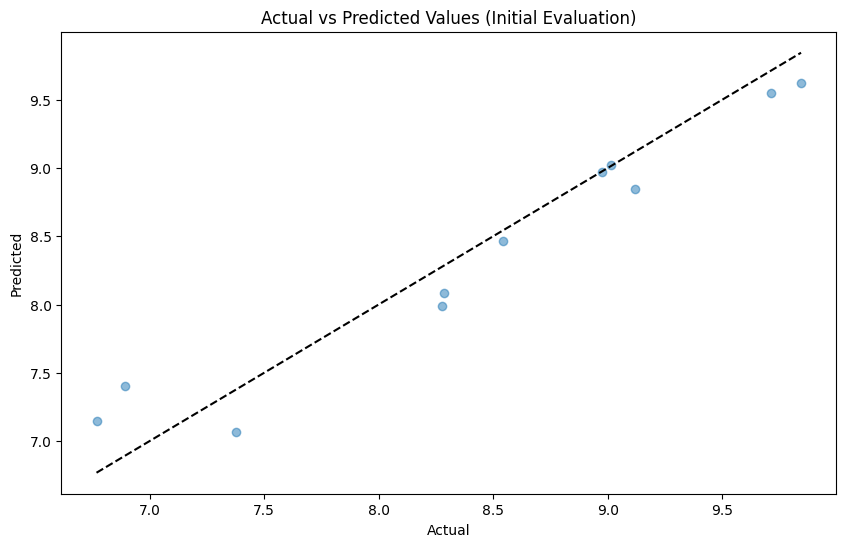

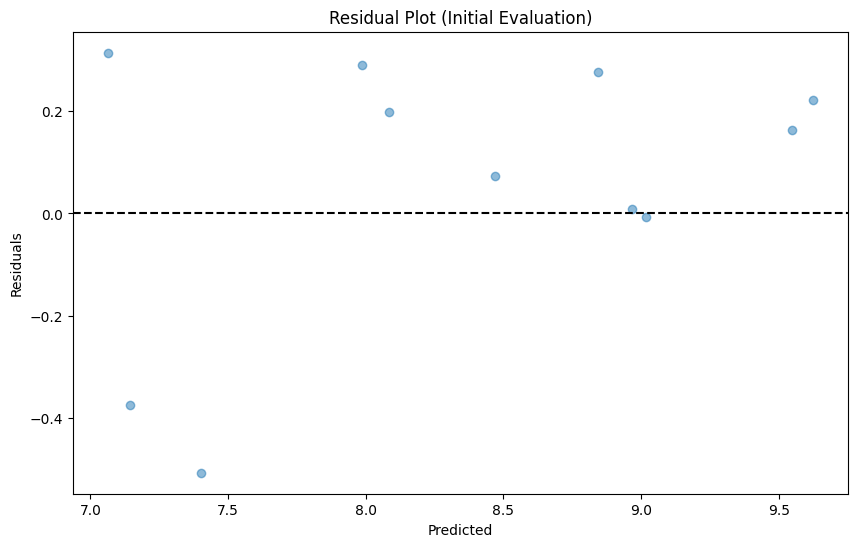

In [ ]:
# Define a more robust custom optimizer with increased max_iter and improved parameters
def custom_optimizer(obj_func, initial_theta, bounds):
    # Increase max iterations and add more parameters to improve convergence
    options = {
        'maxiter': 10000,  # Significantly increased max iterations
        'ftol': 1e-9,      # Function tolerance for convergence
        'gtol': 1e-7,      # Gradient tolerance for convergence
        'maxfun': 15000,   # Maximum number of function evaluations
        'maxls': 50        # Maximum number of line search steps
    }
    res = minimize(obj_func, initial_theta, method='L-BFGS-B', jac=True,
                   bounds=bounds, options=options)
    return res.x, res.fun

# --- Initial GPR setup and performance evaluation ---
# Split the initial data into training and testing sets for *initial evaluation* of the GPR performance.
# This split will NOT be used for the BO loop's training, but for showing the model's accuracy on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for and handle outliers in the *evaluation training* target variable
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (y_train >= lower_bound) & (y_train <= upper_bound)

print(f"Removing {np.sum(~outlier_mask)} outliers from evaluation training data")
X_train_filtered = X_train[outlier_mask]
y_train_filtered = y_train[outlier_mask]

# --- Ensure data is properly scaled for initial evaluation ---
# Create a robust scaler instance (global variable).
# This 'scaler' instance will be updated throughout the BO process.
global scaler
scaler = RobustScaler()
# Fit scaler only on evaluation training data
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test)  # Transform test data using the fitted scaler

# --- Define a more flexible kernel (global variable) ---
global kernel
kernel = C(1.0, (1e-5, 1e5)) * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))

# Initialize the GPR model (global variable) with the custom optimizer.
# This 'gpr_model' instance will be updated throughout the BO process.
global gpr_model
gpr_model = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=15,  # Increased number of restarts
    optimizer=custom_optimizer,
    random_state=0,
    normalize_y=True,         # Normalize target values
    alpha=1e-10               # Small regularization to improve numerical stability
)

print("Training initial GPR model for evaluation on scaled training data...")
# Train the GPR model ONLY on the scaled evaluation training data for initial performance metrics
gpr_model.fit(X_train_scaled, y_train_filtered)

# Make predictions for initial evaluation
y_pred = gpr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized kernel parameters: {gpr_model.kernel_}")
print(f"Log marginal likelihood: {gpr_model.log_marginal_likelihood(gpr_model.kernel_.theta)}")
print(f"Test MSE (initial evaluation): {mse}")
print(f"R² Score (initial evaluation): {r2}")

# Visualize predictions vs actual (for initial evaluation)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Initial Evaluation)')
plt.show()

# Plot residuals (for initial evaluation)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot (Initial Evaluation)')
plt.show()

# --- IMPORTANT FOR BO ---
# For Bayesian Optimization, we will use the *entire* accumulated X and y data to train the GPR model.
# The `scaler` and `gpr_model` global instances will be re-fitted on the growing dataset in the BO loop.


## Visualization

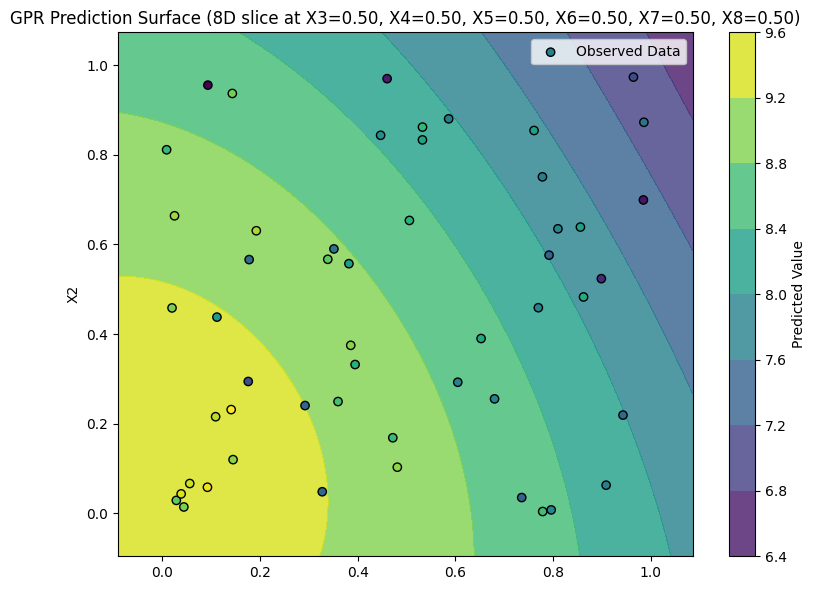

In [ ]:
# Create a meshgrid for plotting (using the first two features of X)
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                           np.linspace(y_min, y_max, 100))

# To make a 2D plot of a 6D model, we need to fix the features.
# A value of 0.5 is chosen as a neutral mid-point in a typically normalized feature space.
x3_fixed_value = 0.5
x4_fixed_value = 0.5
x5_fixed_value = 0.5
x6_fixed_value = 0.5
x7_fixed_value = 0.5
x8_fixed_value = 0.5


# Create candidate points for prediction on the meshgrid
# Combine the 2D meshgrid with the fixed features for prediction
x3_fixed_meshgrid = np.full(xx.ravel().shape, x3_fixed_value)
x4_fixed_meshgrid = np.full(xx.ravel().shape, x4_fixed_value)
x5_fixed_meshgrid = np.full(xx.ravel().shape, x5_fixed_value)
x6_fixed_meshgrid = np.full(xx.ravel().shape, x6_fixed_value)
x7_fixed_meshgrid = np.full(xx.ravel().shape, x7_fixed_value)
x8_fixed_meshgrid = np.full(xx.ravel().shape, x8_fixed_value)
candidate_points_meshgrid = np.c_[xx.ravel(), yy.ravel(), x3_fixed_meshgrid, x4_fixed_meshgrid, x5_fixed_meshgrid, x6_fixed_meshgrid, x7_fixed_meshgrid, x8_fixed_meshgrid]


# Predict on the meshgrid using the trained GPR model
# We need the gpr_model from the previous cell.
# Ensure the previous cell (training GPR) has been run.
try:
    # Scale the candidate points using the same scaler fitted on the training data
    candidate_points_meshgrid_scaled = scaler.transform(candidate_points_meshgrid)
    Z = gpr_model.predict(candidate_points_meshgrid_scaled)
    Z = Z.reshape(xx.shape)

    # Plot the results
    fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # Create a single plot for GPR 8D visualization

    im = ax.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
    # Scatter plot the original data points using the first two features and color by target value
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolors='k', label='Observed Data')
    ax.set_title(f'GPR Prediction Surface (8D slice at X3={x3_fixed_value:.2f}, X4={x4_fixed_value:.2f}, X5={x5_fixed_value:.2f}, X6={x6_fixed_value:.2f}, X7={x7_fixed_value:.2f}, X8={x8_fixed_value:.2f})')
    ax.set_ylabel('X2')
    fig.colorbar(im, ax=ax, label='Predicted Value')
    ax.legend()

    plt.tight_layout()
    plt.show()

except NameError:
    print("GPR model (gpr_model) not found. Please ensure the previous cell was run to train the model.")
except ValueError as e:
    print(f"An error occurred during prediction: {e}")
    print("This might happen if the GPR model was trained on a different number of features than what's provided for prediction.")
    print("Please ensure that the GPR model (from cell DkzizGWdpSBz) was trained on 6 features, and that 'X' at the time of its training was 6-dimensional.")


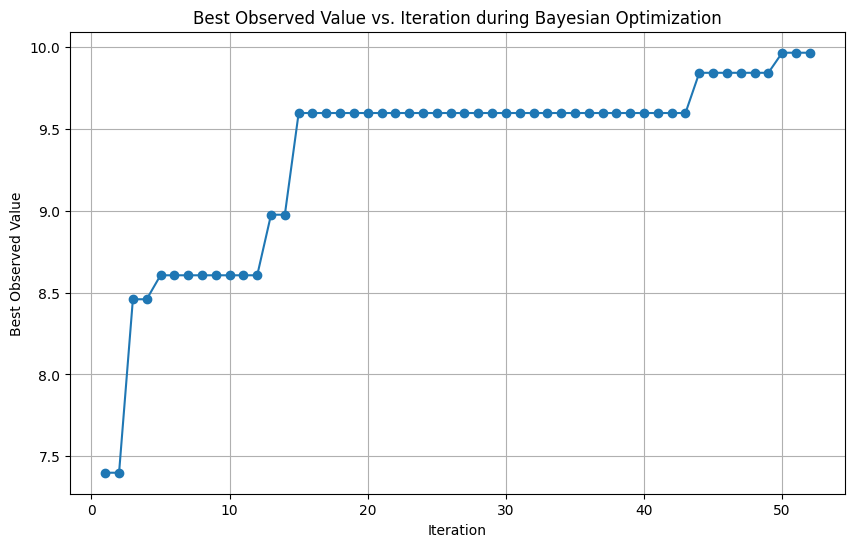

In [ ]:
# Assuming 'y' is the array of all observed values during the optimization
# Calculate the best observed value at each iteration
best_y_per_iteration = np.maximum.accumulate(y)

# Plot the best observed value per iteration
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(best_y_per_iteration) + 1), best_y_per_iteration, marker='o', linestyle='-')
plt.title('Best Observed Value vs. Iteration during Bayesian Optimization')
plt.xlabel('Iteration')
plt.ylabel('Best Observed Value')
plt.grid(True)
plt.show()


## Acquisition function

### Evaluate Candidate Points with UCB/EI/PI


In [ ]:
# Define a custom optimizer with increased max_iter for L-BFGS-B (re-declared for self-containment)
def custom_optimizer(obj_func, initial_theta, bounds):
    options = {
        'maxiter': 10000,
        'ftol': 1e-9,
        'gtol': 1e-7,
        'maxfun': 15000,
        'maxls': 50
    }
    res = minimize(obj_func, initial_theta, method='L-BFGS-B', jac=True,
                   bounds=bounds, options=options)
    return res.x, res.fun

# Define the UCB Acquisition Function
def upper_confidence_bound_gpr(X_new, model, kappa=0.1):
    mean_prediction, std_prediction = model.predict(X_new, return_std=True)
    std_prediction = np.maximum(std_prediction, 1e-9)
    upper_confidence_bound_value = mean_prediction + kappa * std_prediction
    return upper_confidence_bound_value

# Define the EI Acquisition Function
def expected_improvement_gpr(X_new, model, Y_best, xi=0.01):
    mean_prediction, std_prediction = model.predict(X_new, return_std=True)
    std_prediction = np.maximum(std_prediction, 1e-9)
    improvement = mean_prediction - Y_best - xi
    Z = improvement / std_prediction
    ei = improvement * norm.cdf(Z) + std_prediction * norm.pdf(Z)
    return np.maximum(0, ei)

# Define the PI Acquisition Function
def probability_of_improvement_gpr(X_new, model, Y_best, xi=0.01):
    mean_prediction, std_prediction = model.predict(X_new, return_std=True)
    std_prediction = np.maximum(std_prediction, 1e-9)
    improvement = mean_prediction - Y_best - xi
    Z = improvement / std_prediction
    pi = norm.cdf(Z)
    return pi

# --- Setup GPR model for Bayesian Optimization ---
# Ensure the global scaler and gpr_model are used and updated for the start of BO.
# These will be the instances used by the subsequent BO loop.
global scaler, gpr_model, kernel # Ensure access to global instances

scaler = RobustScaler() # Re-instantiate scaler to ensure clean state
X_full_scaled = scaler.fit_transform(X) # Fit scaler on the *entire* current X dataset

kernel = C(1.0, (1e-5, 1e5)) * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5)) # Re-instantiate kernel
gpr_model = GaussianProcessRegressor( # Re-instantiate gpr_model
    kernel=kernel,
    n_restarts_optimizer=15,
    optimizer=custom_optimizer,
    random_state=0,
    normalize_y=True,
    alpha=1e-10
)

print("Training GPR model on all current data for Bayesian Optimization...")
gpr_model.fit(X_full_scaled, y) # Train on the *entire* current X and y
print("Gaussian Process Regressor model trained.")

# --- Generate Candidate Points for evaluating acquisition functions ---
# Define the bounds of the search space based on the observed data
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
x3_min, x3_max = X[:, 2].min(), X[:, 2].max()
x4_min, x4_max = X[:, 3].min(), X[:, 3].max()
x5_min, x5_max = X[:, 4].min(), X[:, 4].max()
x6_min, x6_max = X[:, 5].min(), X[:, 5].max()
x7_min, x7_max = X[:, 6].min(), X[:, 6].max()
x8_min, x8_max = X[:, 7].min(), X[:, 7].max()

# --- Generating Random Points ---
n_random_points = 10000

random_candidate_points = np.random.uniform(low=[x1_min, x2_min, x3_min, x4_min, x5_min, x6_min, x7_min, x8_min],
                                            high=[x1_max, x2_max, x3_max, x4_max, x5_max, x6_max, x7_max, x8_max],
                                            size=(n_random_points, 8))

# Scale the random candidate points before passing them to the GPR model
random_candidate_points_scaled = scaler.transform(random_candidate_points)

# --- Evaluate Candidate Points with UCB, EI, and PI ---
kappa_ucb = 0.1 # Reduced kappa for more exploitation
random_ucb_values_gpr = upper_confidence_bound_gpr(random_candidate_points_scaled, gpr_model, kappa=kappa_ucb)
max_ucb_index_random_gpr = np.argmax(random_ucb_values_gpr)
next_query_point_ucb = random_candidate_points[max_ucb_index_random_gpr]

current_best_y = np.max(y) # Get the current best observed value from the *entire* y
random_ei_values_gpr = expected_improvement_gpr(random_candidate_points_scaled, gpr_model, current_best_y)
max_ei_index_random_gpr = np.argmax(random_ei_values_gpr)
next_query_point_ei = random_candidate_points[max_ei_index_random_gpr]

xi_pi = 0.01
random_pi_values_gpr = probability_of_improvement_gpr(random_candidate_points_scaled, gpr_model, current_best_y, xi=xi_pi)
max_pi_index_random_gpr = np.argmax(random_pi_values_gpr)
next_query_point_pi = random_candidate_points[max_pi_index_random_gpr]

print("\nRecommended next query points based on each acquisition function:")
print(f"  UCB: {[f'{val:.6f}' for val in next_query_point_ucb]} (UCB value: {random_ucb_values_gpr[max_ucb_index_random_gpr]:.4f})")
print(f"  EI: {[f'{val:.6f}' for val in next_query_point_ei]} (EI value: {random_ei_values_gpr[max_ei_index_random_gpr]:.4f})")
print(f"  PI: {[f'{val:.6f}' for val in next_query_point_pi]} (PI value: {random_pi_values_gpr[max_pi_index_random_gpr]:.4f})")